<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing Chipotle Data

_Author: Joseph Nelson (DC)_

---

For Project 2, you will complete a series of exercises exploring [order data from Chipotle](https://github.com/TheUpshot/chipotle), compliments of _The New York Times'_ "The Upshot."

For these exercises, you will conduct basic exploratory data analysis (Pandas not required) to understand the essentials of Chipotle's order data: how many orders are being made, the average price per order, how many different ingredients are used, etc. These allow you to practice business analysis skills while also becoming comfortable with Python.

---

## Basic Level

### Part 1: Read in the file with `csv.reader()` and store it in an object called `file_nested_list`.

Hint: This is a TSV (tab-separated value) file, and `csv.reader()` needs to be told [how to handle it](https://docs.python.org/2/library/csv.html).

In [2]:
import csv
from collections import namedtuple   # Convenient to store the data rows
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DATA_FILE = './data/chipotle.tsv'

In [3]:
file_nested_list = pd.read_csv(DATA_FILE, sep = '	')

In [4]:
#check data types of the columns - see that the item_price is an object, not integer or float
file_nested_list.dtypes

#create a new column to remove the dollar sign from the string and convert it to a float (to keep the cents)
file_nested_list['true_price']=file_nested_list.item_price.replace({'\$':''}, regex = True)

file_nested_list['true_price'] = pd.to_numeric(file_nested_list['true_price'], errors='coerce')
#df['true_price'].astype(float)


### Part 2: Separate `file_nested_list` into the `header` and the `data`.


In [6]:
file_nested_list.head()

header = file_nested_list.columns.values

---

## Intermediate Level

### Part 3: Calculate the average price of an order.

Hint: Examine the data to see if the `quantity` column is relevant to this calculation.

Hint: Think carefully about the simplest way to do this!

In [7]:
#check to see if quantity is needed in the calculation
#it seems like the item_price is actually a calculation based on the quantity, not the actual menu price of the item

file_nested_list.sort_values(by=['quantity'], ascending=False)

,order_id,quantity,item_name,choice_description,item_price,true_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,$44.25,44.25
4152,1660,10,Bottled Water,NaN,$15.00,15.00
3887,1559,8,Side of Chips,NaN,$13.52,13.52
3599,1443,7,Bottled Water,NaN,$10.50,10.50
2441,970,5,Bottled Water,NaN,$7.50,7.50
4491,1786,4,Canned Soft Drink,[Sprite],$5.00,5.00
3602,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",$35.00,35.00
1425,577,4,Bottled Water,NaN,$6.00,6.00
4489,1786,4,Chips and Guacamole,NaN,$17.80,17.80
4490,1786,4,Canned Soft Drink,[Coke],$5.00,5.00


In [8]:
#aggregated the total value of every order
#deduplicated the order_id column since the dataset represented separate items within each individual order on mulitple rows
file_nested_list['true_price'].sum()/file_nested_list['order_id'].nunique()

18.811428571428575

### Part 4: Create a list (or set) named `unique_sodas` containing all of unique sodas and soft drinks that Chipotle sells.

Note: Just look for `'Canned Soda'` and `'Canned Soft Drink'`, and ignore other drinks like `'Izze'`.

In [11]:
#create a subset of the main chipotle file, with just the rows that include items named 'Canned Soda' and 'Canned Softdrink'
#Pull the choice description (which represents the name of the drink) and deduplicate
unique_sodas = file_nested_list[(file_nested_list['item_name']=='Canned Soda')|(file_nested_list['item_name']=='Canned Soft Drink')]['choice_description'].unique()

In [12]:
unique_sodas

array(['[Sprite]', '[Dr. Pepper]', '[Mountain Dew]', '[Diet Dr. Pepper]',
       '[Coca Cola]', '[Diet Coke]', '[Coke]', '[Lemonade]', '[Nestea]'],
      dtype=object)

---

## Advanced Level


### Part 5: Calculate the average number of toppings per burrito.

Note: Let's ignore the `quantity` column to simplify this task.

Hint: Think carefully about the easiest way to count the number of toppings!


In [13]:
#I ignored the quantity and assumed the salsa selection was included in the number of toppings
#create column to classify the item name within the order, hoping it might be useful in the Bonus section
conditions = [   
    file_nested_list['item_name'].str.contains('Burrito', regex=True),
    file_nested_list['item_name'].str.contains('Bowl', regex=True),
    file_nested_list['item_name'].str.contains('Tacos', regex=True),
    file_nested_list['item_name'].str.contains('Salad', regex=True), 
]

results = [
    'Burrito',
    'Bowl',
    'Tacos',
    'Salad'
]

file_nested_list['main_meal'] = np.select(conditions, results,'Other')

In [14]:
#created a function to count the number of toppings in the description by virtue of the commas separating the items
def count_toppings(val):
    item_list = [item for item in val if item == ',']
    return len(item_list)+1

In [15]:
#replaced the NaN values in the 'choice description' columns to make the values iterable
file_nested_list['choice_description'].fillna(value='', inplace=True)

In [16]:
#created a new column that applies the count_toppings function to the 'choice_description' column
#need to recalibrate so that the item names with no toppings  or 'descriptions' - chips & salsa, sodas, etc have zero
file_nested_list['number_toppings'] = file_nested_list['choice_description'].apply(count_toppings)

In [17]:
file_nested_list[file_nested_list['main_meal']=='Burrito']['number_toppings'].mean()

5.395051194539249


### Part 6: Create a dictionary. Let the keys represent chip orders and the values represent the total number of orders.

Expected output: `{'Chips and Roasted Chili-Corn Salsa': 18, ... }`

Note: Please take the `quantity` column into account!

Optional: Learn how to use `.defaultdict()` to simplify your code.

In [18]:
#imported defaultdict but did not use yet
from collections import defaultdict

In [19]:
#initially created a dataframe only showing item_names with 'Chips' in the string
#from this subset, I pivoted by the item name and aggregated the quanity column 
chips_list = file_nested_list[file_nested_list['item_name'].str.contains('Chips', regex=True)].groupby('item_name')['quantity'].sum()

In [20]:
#converted the subset to a dictionary
chips_dictionary = chips_list.to_dict()

In [21]:
chips_dictionary

#it seems like we should re-classify some of the item names

{'Chips': 230,
 'Chips and Fresh Tomato Salsa': 130,
 'Chips and Guacamole': 506,
 'Chips and Mild Fresh Tomato Salsa': 1,
 'Chips and Roasted Chili Corn Salsa': 23,
 'Chips and Roasted Chili-Corn Salsa': 18,
 'Chips and Tomatillo Green Chili Salsa': 45,
 'Chips and Tomatillo Red Chili Salsa': 50,
 'Chips and Tomatillo-Green Chili Salsa': 33,
 'Chips and Tomatillo-Red Chili Salsa': 25,
 'Side of Chips': 110}

In [22]:
#honestly, this is what I would do in excel... almost a vlookup approach to reclassify the item names
conditions = [
    (file_nested_list['item_name'] =='6 Pack Soft Drink'),
    (file_nested_list['item_name'] =='Barbacoa Bowl'),
    (file_nested_list['item_name'] =='Barbacoa Burrito'),
    (file_nested_list['item_name'] =='Barbacoa Crispy Tacos'),
    (file_nested_list['item_name'] =='Barbacoa Salad Bowl'),
    (file_nested_list['item_name'] =='Barbacoa Soft Tacos'),
    (file_nested_list['item_name'] =='Bottled Water'),
    (file_nested_list['item_name'] =='Bowl'),
    (file_nested_list['item_name'] =='Burrito'),
    (file_nested_list['item_name'] =='Canned Soda'),
    (file_nested_list['item_name'] =='Canned Soft Drink'),
    (file_nested_list['item_name'] =='Carnitas Bowl'),
    (file_nested_list['item_name'] =='Carnitas Burrito'),
    (file_nested_list['item_name'] =='Carnitas Crispy Tacos'),
    (file_nested_list['item_name'] =='Carnitas Salad'),
    (file_nested_list['item_name'] =='Carnitas Salad Bowl'),
    (file_nested_list['item_name'] =='Carnitas Soft Tacos'),
    (file_nested_list['item_name'] =='Chicken Bowl'),
    (file_nested_list['item_name'] =='Chicken Burrito'),
    (file_nested_list['item_name'] =='Chicken Crispy Tacos'),
    (file_nested_list['item_name'] =='Chicken Salad'),
    (file_nested_list['item_name'] =='Chicken Salad Bowl'),
    (file_nested_list['item_name'] =='Chicken Soft Tacos'),
    (file_nested_list['item_name'] =='Chips'),
    (file_nested_list['item_name'] =='Chips and Fresh Tomato Salsa'),
    (file_nested_list['item_name'] =='Chips and Guacamole'),
    (file_nested_list['item_name'] =='Chips and Mild Fresh Tomato Salsa'),
    (file_nested_list['item_name'] =='Chips and Roasted Chili Corn Salsa'),
    (file_nested_list['item_name'] =='Chips and Roasted Chili-Corn Salsa'),
    (file_nested_list['item_name'] =='Chips and Tomatillo Green Chili Salsa'),
    (file_nested_list['item_name'] =='Chips and Tomatillo Red Chili Salsa'),
    (file_nested_list['item_name'] =='Chips and Tomatillo-Green Chili Salsa'),
    (file_nested_list['item_name'] =='Chips and Tomatillo-Red Chili Salsa'),
    (file_nested_list['item_name'] =='Crispy Tacos'),
    (file_nested_list['item_name'] =='Izze'),
    (file_nested_list['item_name'] =='Nantucket Nectar'),
    (file_nested_list['item_name'] =='Salad'),
    (file_nested_list['item_name'] =='Side of Chips'),
    (file_nested_list['item_name'] =='Steak Bowl'),
    (file_nested_list['item_name'] =='Steak Burrito'),
    (file_nested_list['item_name'] =='Steak Crispy Tacos'),
    (file_nested_list['item_name'] =='Steak Salad'),
    (file_nested_list['item_name'] =='Steak Salad Bowl'),
    (file_nested_list['item_name'] =='Steak Soft Tacos'),
    (file_nested_list['item_name'] =='Veggie Bowl'),
    (file_nested_list['item_name'] =='Veggie Burrito'),
    (file_nested_list['item_name'] =='Veggie Crispy Tacos'),
    (file_nested_list['item_name'] =='Veggie Salad'),
    (file_nested_list['item_name'] =='Veggie Salad Bowl'),
    (file_nested_list['item_name'] =='Veggie Soft Tacos'),
]

results = [
    '6 Pack Soft Drink',
    'Barbacoa Bowl',
    'Barbacoa Burrito',
    'Barbacoa Crispy Tacos',
    'Barbacoa Salad',
    'Barbacoa Soft Tacos',
    'Bottled Water',
    'Bowl',
    'Burrito',
    'Canned Soft Drink',
    'Canned Soft Drink',
    'Carnitas Bowl',
    'Carnitas Burrito',
    'Carnitas Crispy Tacos',
    'Carnitas Salad',
    'Carnitas Salad',
    'Carnitas Soft Tacos',
    'Chicken Bowl',
    'Chicken Burrito',
    'Chicken Crispy Tacos',
    'Chicken Salad',
    'Chicken Salad',
    'Chicken Soft Tacos',
    'Side of Chips',
    'Chips and Fresh Tomato Salsa',
    'Chips and Guacamole',
    'Chips and Fresh Tomato Salsa',
    'Chips and Roasted Chili-Corn Salsa',
    'Chips and Roasted Chili-Corn Salsa',
    'Chips and Tomatillo-Green Chili Salsa',
    'Chips and Tomatillo-Red Chili Salsa',
    'Chips and Tomatillo-Green Chili Salsa',
    'Chips and Tomatillo-Red Chili Salsa',
    'Crispy Tacos',
    'Izze',
    'Nantucket Nectar',
    'Salad',
    'Side of Chips',
    'Steak Bowl',
    'Steak Burrito',
    'Steak Crispy Tacos',
    'Steak Salad',
    'Steak Salad',
    'Steak Soft Tacos',
    'Veggie Bowl',
    'Veggie Burrito',
    'Veggie Crispy Tacos',
    'Veggie Salad',
    'Veggie Salad',
    'Veggie Soft Tacos',
]

file_nested_list['true_item_name'] = np.select(conditions, results,'Other')

In [23]:
chips_list_updated = file_nested_list[file_nested_list['true_item_name'].str.contains('Chips', regex=True)].groupby('true_item_name')['quantity'].sum()

In [24]:
chips_dictionary_updated = chips_list_updated.to_dict()

In [25]:
#new chips dictionary based on the updated item names
#it seems like corn is not a popular option 
chips_dictionary_updated

{'Chips and Fresh Tomato Salsa': 131,
 'Chips and Guacamole': 506,
 'Chips and Roasted Chili-Corn Salsa': 41,
 'Chips and Tomatillo-Green Chili Salsa': 78,
 'Chips and Tomatillo-Red Chili Salsa': 75,
 'Side of Chips': 340}

In [26]:
conditions = [   
    (file_nested_list['choice_description'].str.contains('Tomatillo-Red', regex=True)),
    (file_nested_list['choice_description'].str.contains('Tomatillo Red', regex=True)),
    (file_nested_list['choice_description'].str.contains('Tomatillo Green', regex=True)),
    (file_nested_list['choice_description'].str.contains('Tomatillo-Green', regex=True)),
    (file_nested_list['choice_description'].str.contains('Fresh', regex=True)),
    (file_nested_list['choice_description'].str.contains('Mild', regex=True)),
    (file_nested_list['choice_description'].str.contains('Corn', regex=True))
]
    
results = [
    'Hot',
    'Hot',
    'Medium',
    'Medium',
    'Mild',
    'Mild',
    'Mild'
]

file_nested_list['salsa_topping_type'] = np.select(conditions, results,'Other')

In [27]:
#for the purposes of the deeper analysis, I created a column 'item_type', based on broader menu options
conditions = [
    (file_nested_list['item_name'] =='6 Pack Soft Drink'),
    (file_nested_list['item_name'] =='Barbacoa Bowl'),
    (file_nested_list['item_name'] =='Barbacoa Burrito'),
    (file_nested_list['item_name'] =='Barbacoa Crispy Tacos'),
    (file_nested_list['item_name'] =='Barbacoa Salad Bowl'),
    (file_nested_list['item_name'] =='Barbacoa Soft Tacos'),
    (file_nested_list['item_name'] =='Bottled Water'),
    (file_nested_list['item_name'] =='Bowl'),
    (file_nested_list['item_name'] =='Burrito'),
    (file_nested_list['item_name'] =='Canned Soda'),
    (file_nested_list['item_name'] =='Canned Soft Drink'),
    (file_nested_list['item_name'] =='Carnitas Bowl'),
    (file_nested_list['item_name'] =='Carnitas Burrito'),
    (file_nested_list['item_name'] =='Carnitas Crispy Tacos'),
    (file_nested_list['item_name'] =='Carnitas Salad'),
    (file_nested_list['item_name'] =='Carnitas Salad Bowl'),
    (file_nested_list['item_name'] =='Carnitas Soft Tacos'),
    (file_nested_list['item_name'] =='Chicken Bowl'),
    (file_nested_list['item_name'] =='Chicken Burrito'),
    (file_nested_list['item_name'] =='Chicken Crispy Tacos'),
    (file_nested_list['item_name'] =='Chicken Salad'),
    (file_nested_list['item_name'] =='Chicken Salad Bowl'),
    (file_nested_list['item_name'] =='Chicken Soft Tacos'),
    (file_nested_list['item_name'] =='Chips'),
    (file_nested_list['item_name'] =='Chips and Fresh Tomato Salsa'),
    (file_nested_list['item_name'] =='Chips and Guacamole'),
    (file_nested_list['item_name'] =='Chips and Mild Fresh Tomato Salsa'),
    (file_nested_list['item_name'] =='Chips and Roasted Chili Corn Salsa'),
    (file_nested_list['item_name'] =='Chips and Roasted Chili-Corn Salsa'),
    (file_nested_list['item_name'] =='Chips and Tomatillo Green Chili Salsa'),
    (file_nested_list['item_name'] =='Chips and Tomatillo Red Chili Salsa'),
    (file_nested_list['item_name'] =='Chips and Tomatillo-Green Chili Salsa'),
    (file_nested_list['item_name'] =='Chips and Tomatillo-Red Chili Salsa'),
    (file_nested_list['item_name'] =='Crispy Tacos'),
    (file_nested_list['item_name'] =='Izze'),
    (file_nested_list['item_name'] =='Nantucket Nectar'),
    (file_nested_list['item_name'] =='Salad'),
    (file_nested_list['item_name'] =='Side of Chips'),
    (file_nested_list['item_name'] =='Steak Bowl'),
    (file_nested_list['item_name'] =='Steak Burrito'),
    (file_nested_list['item_name'] =='Steak Crispy Tacos'),
    (file_nested_list['item_name'] =='Steak Salad'),
    (file_nested_list['item_name'] =='Steak Salad Bowl'),
    (file_nested_list['item_name'] =='Steak Soft Tacos'),
    (file_nested_list['item_name'] =='Veggie Bowl'),
    (file_nested_list['item_name'] =='Veggie Burrito'),
    (file_nested_list['item_name'] =='Veggie Crispy Tacos'),
    (file_nested_list['item_name'] =='Veggie Salad'),
    (file_nested_list['item_name'] =='Veggie Salad Bowl'),
    (file_nested_list['item_name'] =='Veggie Soft Tacos'),
]

results = [
    'Drink',
    'Bowl',
    'Burrito',
    'Tacos',
    'Salad',
    'Tacos',
    'Drink',
    'Bowl',
    'Burrito',
    'Drink',
    'Drink',
    'Bowl',
    'Burrito',
    'Tacos',
    'Salad',
    'Salad',
    'Tacos',
    'Bowl',
    'Burrito',
    'Tacos',
    'Salad',
    'Salad',
    'Tacos',
    'Side',
    'Side',
    'Side',
    'Side',
    'Side',
    'Side',
    'Side',
    'Side',
    'Side',
    'Side',
    'Tacos',
    'Drink',
    'Drink',
    'Salad',
    'Side',
    'Bowl',
    'Burrito',
    'Tacos',
    'Salad',
    'Salad',
    'Tacos',
    'Bowl',
    'Burrito',
    'Tacos',
    'Salad',
    'Salad',
    'Tacos',
]

file_nested_list['item_type'] = np.select(conditions, results,'Other')

In [28]:
#for the purposes of the deeper analysis, I also created a column 'meat_type', based on the type meal protein. 
conditions = [
    (file_nested_list['item_name'] =='6 Pack Soft Drink'),
    (file_nested_list['item_name'] =='Barbacoa Bowl'),
    (file_nested_list['item_name'] =='Barbacoa Burrito'),
    (file_nested_list['item_name'] =='Barbacoa Crispy Tacos'),
    (file_nested_list['item_name'] =='Barbacoa Salad Bowl'),
    (file_nested_list['item_name'] =='Barbacoa Soft Tacos'),
    (file_nested_list['item_name'] =='Bottled Water'),
    (file_nested_list['item_name'] =='Bowl'),
    (file_nested_list['item_name'] =='Burrito'),
    (file_nested_list['item_name'] =='Canned Soda'),
    (file_nested_list['item_name'] =='Canned Soft Drink'),
    (file_nested_list['item_name'] =='Carnitas Bowl'),
    (file_nested_list['item_name'] =='Carnitas Burrito'),
    (file_nested_list['item_name'] =='Carnitas Crispy Tacos'),
    (file_nested_list['item_name'] =='Carnitas Salad'),
    (file_nested_list['item_name'] =='Carnitas Salad Bowl'),
    (file_nested_list['item_name'] =='Carnitas Soft Tacos'),
    (file_nested_list['item_name'] =='Chicken Bowl'),
    (file_nested_list['item_name'] =='Chicken Burrito'),
    (file_nested_list['item_name'] =='Chicken Crispy Tacos'),
    (file_nested_list['item_name'] =='Chicken Salad'),
    (file_nested_list['item_name'] =='Chicken Salad Bowl'),
    (file_nested_list['item_name'] =='Chicken Soft Tacos'),
    (file_nested_list['item_name'] =='Chips'),
    (file_nested_list['item_name'] =='Chips and Fresh Tomato Salsa'),
    (file_nested_list['item_name'] =='Chips and Guacamole'),
    (file_nested_list['item_name'] =='Chips and Mild Fresh Tomato Salsa'),
    (file_nested_list['item_name'] =='Chips and Roasted Chili Corn Salsa'),
    (file_nested_list['item_name'] =='Chips and Roasted Chili-Corn Salsa'),
    (file_nested_list['item_name'] =='Chips and Tomatillo Green Chili Salsa'),
    (file_nested_list['item_name'] =='Chips and Tomatillo Red Chili Salsa'),
    (file_nested_list['item_name'] =='Chips and Tomatillo-Green Chili Salsa'),
    (file_nested_list['item_name'] =='Chips and Tomatillo-Red Chili Salsa'),
    (file_nested_list['item_name'] =='Crispy Tacos'),
    (file_nested_list['item_name'] =='Izze'),
    (file_nested_list['item_name'] =='Nantucket Nectar'),
    (file_nested_list['item_name'] =='Salad'),
    (file_nested_list['item_name'] =='Side of Chips'),
    (file_nested_list['item_name'] =='Steak Bowl'),
    (file_nested_list['item_name'] =='Steak Burrito'),
    (file_nested_list['item_name'] =='Steak Crispy Tacos'),
    (file_nested_list['item_name'] =='Steak Salad'),
    (file_nested_list['item_name'] =='Steak Salad Bowl'),
    (file_nested_list['item_name'] =='Steak Soft Tacos'),
    (file_nested_list['item_name'] =='Veggie Bowl'),
    (file_nested_list['item_name'] =='Veggie Burrito'),
    (file_nested_list['item_name'] =='Veggie Crispy Tacos'),
    (file_nested_list['item_name'] =='Veggie Salad'),
    (file_nested_list['item_name'] =='Veggie Salad Bowl'),
    (file_nested_list['item_name'] =='Veggie Soft Tacos'),
]

results = [
    'NA',
    'Barbacoa',
    'Barbacoa',
    'Barbacoa',
    'Barbacoa',
    'Barbacoa',
    'NA',
    'NA',
    'NA',
    'NA',
    'NA',
    'Carnitas',
    'Carnitas',
    'Carnitas',
    'Carnitas',
    'Carnitas',
    'Carnitas',
    'Chicken',
    'Chicken',
    'Chicken',
    'Chicken',
    'Chicken',
    'Chicken',
    'NA',
    'NA',
    'NA',
    'NA',
    'NA',
    'NA',
    'NA',
    'NA',
    'NA',
    'NA',
    'NA',
    'NA',
    'NA',
    'NA',
    'NA',
    'Steak',
    'Steak',
    'Steak',
    'Steak',
    'Steak',
    'Steak',
    'Veggie',
    'Veggie',
    'Veggie',
    'Veggie',
    'Veggie',
    'Veggie',
]

file_nested_list['meat_type'] = np.select(conditions, results,'Other')

---

## Bonus: Craft a problem statement about this data that interests you, and then answer it!


In [29]:
#What are the top 10 orders by total order amount?
file_nested_list.groupby('order_id')['true_price'].sum().sort_values(ascending=False).nlargest(10)

order_id
926     205.25
1443    160.74
1483    139.00
691     118.25
1786    114.30
205     109.90
511     104.59
491     102.00
1449     95.39
759      86.30
Name: true_price, dtype: float64

In [30]:
#How many items were in the top order? 
file_nested_list[file_nested_list['order_id']==926]['quantity'].sum()

23

In [31]:
#On average, how many items does an order have?
file_nested_list['quantity'].sum()/file_nested_list['order_id'].nunique()

2.711014176663032

In [32]:
#What is the distribution of each type of menu item?
item_type_ordered = file_nested_list[file_nested_list['item_type']!='Drink'].groupby('item_type')['quantity'].sum().sort_values(ascending=True)

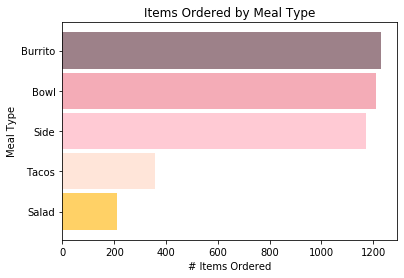

In [33]:
item_type_ordered.plot(kind='barh', width = 0.9, color = ['#FFD166', '#FFE5D9', '#FFCAD4', '#F4ACB7', '#9D8189']);
# Create a title and determine axis names
plt.title('Items Ordered by Meal Type');
plt.xlabel('# Items Ordered');
plt.ylabel('Meal Type');

In [34]:
#Which meal type has the largest number of toppings?
file_nested_list[(file_nested_list['item_type']!='Drink')&(file_nested_list['item_type']!='Side')&(file_nested_list['meat_type']!='NA')].groupby('item_type')['number_toppings'].mean()

item_type
Bowl       5.594291
Burrito    5.392796
Salad      4.927461
Tacos      4.338192
Name: number_toppings, dtype: float64

In [35]:
meals_by_meat = file_nested_list[(file_nested_list['item_type']!='Drink')&(file_nested_list['item_type']!='Side')&(file_nested_list['meat_type']!='NA')]

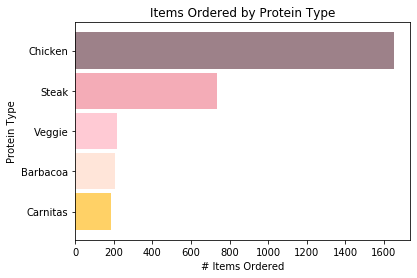

In [36]:
#Looked at the number of main meals (bowls, salad, tacos, burritos) and the type of protein added
meals_by_meat.groupby('meat_type')['quantity'].sum().sort_values().plot(kind='barh', width = 0.9, color = ['#FFD166', '#FFE5D9', '#FFCAD4', '#F4ACB7', '#9D8189']);
# Create a title and determine axis names
plt.title('Items Ordered by Protein Type');
plt.xlabel('# Items Ordered');
plt.ylabel('Protein Type');


In [37]:
meals_by_meat.groupby('meat_type')['number_toppings'].mean()

meat_type
Barbacoa    5.123153
Carnitas    5.419890
Chicken     5.230769
Steak       5.309117
Veggie      6.066038
Name: number_toppings, dtype: float64

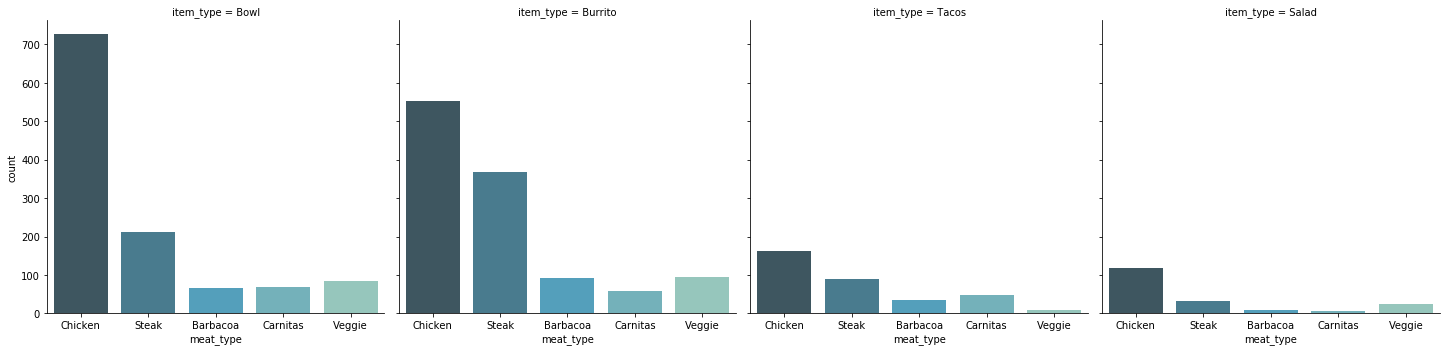

In [38]:
protein_by_meal = sns.catplot('meat_type',
                     col='item_type',
                     data = meals_by_meat, kind='count', palette="GnBu_d");


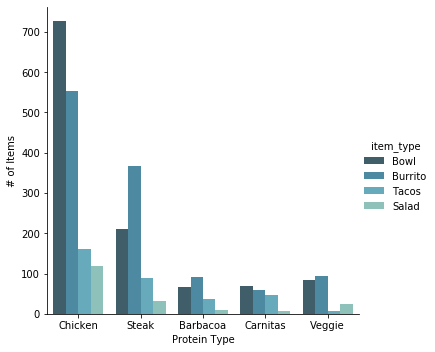

In [39]:
meat_breakout = sns.catplot('meat_type',
                     hue='item_type',
                     data = meals_by_meat, kind='count', palette="GnBu_d");

meat_breakout.set(xlabel='Protein Type',ylabel='# of Items');

In [40]:
proportion_meat = meals_by_meat.groupby(['item_type','meat_type']).sum().groupby(level=0).apply(lambda x: x/x.sum())['quantity']

In [41]:
proportion_meat

item_type  meat_type
Bowl       Barbacoa     0.054726
           Carnitas     0.058872
           Chicken      0.631012
           Steak        0.183250
           Veggie       0.072139
Burrito    Barbacoa     0.074286
           Carnitas     0.048980
           Chicken      0.482449
           Steak        0.315102
           Veggie       0.079184
Salad      Barbacoa     0.048077
           Carnitas     0.033654
           Chicken      0.634615
           Steak        0.168269
           Veggie       0.115385
Tacos      Barbacoa     0.103933
           Carnitas     0.134831
           Chicken      0.477528
           Steak        0.258427
           Veggie       0.025281
Name: quantity, dtype: float64

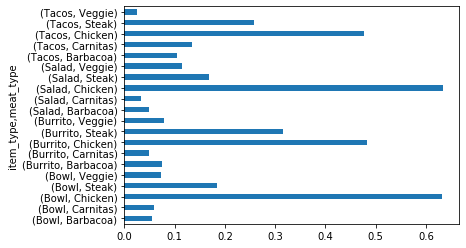

In [42]:
meals_by_meat.groupby(['item_type','meat_type']).sum().groupby(level=0).apply(lambda x: x/x.sum())['quantity'].plot(kind='barh');

In [43]:
meals_by_meat.groupby(['meat_type','salsa_topping_type'])['quantity'].sum().groupby(level=0).apply(lambda x: x/x.sum())

meat_type  salsa_topping_type
Barbacoa   Hot                   0.372549
           Medium                0.127451
           Mild                  0.485294
           Other                 0.014706
Carnitas   Hot                   0.193548
           Medium                0.134409
           Mild                  0.672043
Chicken    Hot                   0.183192
           Medium                0.111245
           Mild                  0.700121
           Other                 0.005441
Steak      Hot                   0.216621
           Medium                0.123978
           Mild                  0.651226
           Other                 0.008174
Veggie     Hot                   0.188940
           Medium                0.064516
           Mild                  0.746544
Name: quantity, dtype: float64

In [44]:
#attempting to create a stacked bar graph

In [142]:

bowl_chicken = proportion_meat.loc['Bowl'].loc['Chicken']
bowl_steak = proportion_meat.loc['Bowl'].loc['Steak']
bowl_barbacoa = proportion_meat.loc['Bowl'].loc['Barbacoa']
bowl_carnitas = proportion_meat.loc['Bowl'].loc['Carnitas']
bowl_veggie = proportion_meat.loc['Bowl'].loc['Veggie']

burrito_chicken = proportion_meat.loc['Burrito'].loc['Chicken']
burrito_steak = proportion_meat.loc['Burrito'].loc['Steak']
burrito_barbacoa = proportion_meat.loc['Burrito'].loc['Barbacoa']
burrito_carnitas = proportion_meat.loc['Burrito'].loc['Carnitas']
burrito_veggie = proportion_meat.loc['Burrito'].loc['Veggie']

taco_chicken = proportion_meat.loc['Tacos'].loc['Chicken']
taco_steak = proportion_meat.loc['Tacos'].loc['Steak']
taco_barbacoa = proportion_meat.loc['Tacos'].loc['Barbacoa']
taco_carnitas = proportion_meat.loc['Tacos'].loc['Carnitas']
taco_veggie = proportion_meat.loc['Tacos'].loc['Veggie']

In [143]:
bowl_list = [bowl_chicken,bowl_steak,bowl_barbacoa,bowl_carnitas,bowl_veggie]
burrito_list = [burrito_chicken,burrito_steak,burrito_barbacoa,burrito_carnitas,burrito_veggie]
taco_list = [taco_chicken, taco_steak, taco_barbacoa, taco_carnitas, taco_veggie]